# ezlocalai Tests and Examples

Simply choose your favorite model of choice from the models list and paste it into the `model` variable on the API calls. You can get a list of models below.

Install OpenAI and requests:

```bash
pip install openai requests python-dotenv
```

**Note, you do not need an OpenAI API Key, the API Key is your `EZLOCALAI_API_KEY` for the server if you defined one in your `.env` file.**

## Global definitions and helpers

Confirm that your `DEFAULT_MODEL` is set to the model you want to use in your `.env` file.


In [2]:
import openai
import requests
import time
import os
import re
from dotenv import load_dotenv

load_dotenv()

# Set your system message, max tokens, temperature, and top p here, or use the defaults.
SYSTEM_MESSAGE = "The assistant is acting as a creative writer. All of your text responses are transcribed to audio and sent to the user. Be concise with all responses. After the request is fulfilled, end with </s>."
DEFAULT_MAX_TOKENS = 512
DEFAULT_TEMPERATURE = 0.5
DEFAULT_TOP_P = 0.9

# ------------------- DO NOT EDIT BELOW THIS LINE IN THIS CELL ------------------- #
EZLOCALAI_SERVER = os.getenv("EZLOCALAI_URL", "http://localhost:8091")
EZLOCALAI_API_KEY = os.getenv("EZLOCALAI_API_KEY", "none")
DEFAULT_LLM = os.getenv("DEFAULT_LLM", "phi-2-dpo")
openai.base_url = f"{EZLOCALAI_SERVER}/v1/"
openai.api_key = EZLOCALAI_API_KEY if EZLOCALAI_API_KEY else EZLOCALAI_SERVER
HEADERS = {
    "Content-Type": "application/json",
    "Authorization": f"{EZLOCALAI_API_KEY}",
    "ngrok-skip-browser-warning": "true",
}


def display_content(content):
    global EZLOCALAI_SERVER
    global HEADERS
    outputs_url = f"{EZLOCALAI_SERVER}/outputs/"
    os.makedirs("outputs", exist_ok=True)
    try:
        from IPython.display import Audio, display, Image, Video
    except:
        print(content)
        return
    if "http://localhost:8091/outputs/" in content:
        if outputs_url != "http://localhost:8091/outputs/":
            content = content.replace("http://localhost:8091/outputs/", outputs_url)
    if "<audio controls>" in content or " " not in content:
        import base64
        from datetime import datetime

        try:
            audio_response = content.split("data:audio/wav;base64,")[1].split('" type')[
                0
            ]
        except:
            audio_response = content
        file_name = f"outputs/{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.wav"
        with open(file_name, "wb") as fh:
            fh.write(base64.b64decode(audio_response))
        display(Audio(filename=file_name, autoplay=True))
    if outputs_url in content:
        urls = re.findall(f"{re.escape(outputs_url)}[^\"' ]+", content)
        urls = urls[0].split("\n\n")
        for url in urls:
            file_name = url.split("/")[-1]
            url = f"{outputs_url}{file_name}"
            data = requests.get(url, headers=HEADERS).content
            if url.endswith(".jpg") or url.endswith(".png"):
                content = content.replace(url, "")
                display(Image(data=data))
            elif url.endswith(".mp4"):
                content = content.replace(url, "")
                display(Video(data=data, autoplay=True))
            elif url.endswith(".wav"):
                content = content.replace(url, "")
                display(Audio(data=data, autoplay=True))
    print(content)

In [ ]:
vlm_test = """
import base64
import requests


def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


image_path = "outputs/fa62f5b2-31a4-4a88-90ec-6ca386324461.png"
base64_image = encode_image(image_path)
response = requests.post(
    f"{EZLOCALAI_SERVER}/v1/chat/completions",
    headers=HEADERS,
    json={
        "model": "mistral-vlm-7b",
        "messages": [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "Whats in this image?"},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                    },
                ],
            }
        ],
        "max_tokens": 300,
    },
)

print(response.json())
"""

## Language Models

Get a list of models to choose from if you don't already know what model you want to use.


In [3]:
# Wait for server to come up instead of timing out.
while True:
    try:
        models = requests.get(f"{EZLOCALAI_SERVER}/v1/models", headers=HEADERS)
        if models.status_code == 200:
            break
    except:
        pass
    time.sleep(1)
print(models.json())

['bakllava-1-7b', 'llava-v1.5-7b', 'llava-v1.5-13b', 'yi-vl-6b', 'sharegpt4v-7b', 'mistral-vlm-7b', 'CapybaraHermes-2.5-Mistral-7B', 'CapybaraHermes-2.5-Mistral-7B', 'KafkaLM-70B-German-V0.1', 'CodeLlama-70B-Python', 'CodeLlama-70B-Instruct', 'CodeLlama-70B-hf', 'Tess-34B-v1.5b', 'Tess-10.7B-v1.5b', 'Goliath-longLORA-120b-rope8-32k-fp16', 'Etheria-55b-v0.1', 'EstopianMaid-13B', 'Everyone-Coder-33B-Base', 'FusionNet_34Bx2_MoE', 'WestLake-7B-v2', 'WestSeverus-7B-DPO', 'DiscoLM_German_7b_v1', 'Garrulus', 'DareVox-7B', 'NexoNimbus-7B', 'Lelantos-Maid-DPO-7B', 'stable-code-3b', 'Dr_Samantha-7B', 'NeuralBeagle14-7B', 'tigerbot-13B-chat-v5', 'Nous-Hermes-2-Mixtral-8x7B-SFT', 'Thespis-13B-DPO-v0.7', 'Code-290k-13B', 'Nous-Hermes-2-Mixtral-8x7B-DPO', 'Venus-120b-v1.2', 'LLaMA2-13B-Estopia', 'medicine-LLM', 'finance-LLM-13B', 'Yi-34B-200K-DARE-megamerge-v8', 'phi-2-orange', 'laser-dolphin-mixtral-2x7b-dpo', 'bagel-dpo-8x7b-v0.2', 'Everyone-Coder-4x7b-Base', 'phi-2-electrical-engineering', 'Cosmo

## Voices

Any `wav` file in the `voices` directory will be available to use as a voice.


In [4]:
voices = requests.get(f"{EZLOCALAI_SERVER}/v1/audio/voices", headers=HEADERS)
print(voices.json())

{'voices': ['default', 'DukeNukem', 'Hal9000_Mono', 'Hal_voice_9000_Synthetic', 'SyntheticStarTrekComputerVoice', 'Synthetic_DukeNukem', 'Synthetic_Female_Hybrid_4_Phonetics_0001', 'Synthetic_Female_Phonetics_0001']}


## Embeddings

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/embeddings)


In [5]:
# Modify this prompt to generate different outputs
prompt = "Tacos are great."

response = openai.embeddings.create(
    input=prompt,
    model=DEFAULT_LLM,
)
print(response.data[0].embedding)

[0.0018005393366052665, -0.013458590992448241, -0.00455923660401266, 0.015780443436577658, 0.0011654721904520483, -0.0032776521107648043, 0.006167969164695305, -0.00911009804110145, -0.006518893118293874, -0.006572893186941832, 0.0014069267756617212, 0.006510373017997707, 0.00514947435613428, 0.02329986303182148, -0.01955484539028603, 0.00016029241932023712, -0.0006189196561641208, -0.009867714327963233, 0.006806612495356921, -0.0012890385745252494, -0.013950657133847785, 0.009551138964225417, 0.001979069844001548, 0.004345053880621693, -0.009279255106519167, -0.0075520048290749755, 0.004134718085330429, -0.004943955427665006, -0.008166295017577173, -0.0011461263724307758, 0.016491528678451814, -0.00142670615505311, 0.000397606899909086, 0.013877525240683378, -0.0031286813530529978, -0.01509626005834582, -0.009668131783710926, 0.006002503564657432, 0.007932423962682542, 0.0013073863497568494, 0.005897902548503226, -0.025627943894719306, 0.02577991334867885, -0.0006774234596766691, 0.00

## Chat Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/chat)


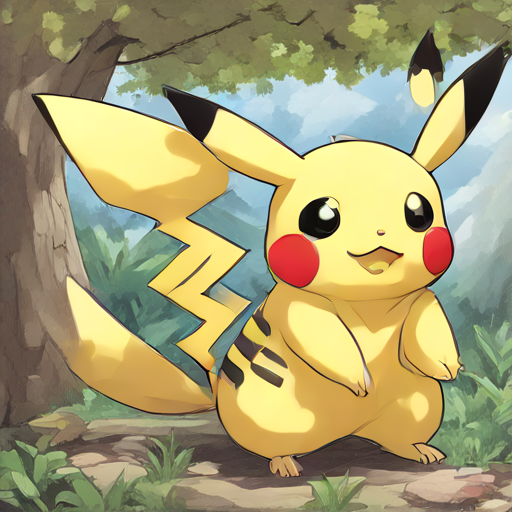

Pikachu, oh so cute,
With his yellow coat so bright.
He's got a tail that's black and white,
And ears that stick up just right.

He's got a face that's hard to forget,
With his big eyes and red cheeks.
He's got a thundershock that's hard to beat,
And he's always ready for a treat.

He's got a hat that's red and white,
And he's always on the go.
He's got a friend that's always by his side,
And together they make a great team.

So if you see him in the wild,
Don't be afraid to give him a smile.
He's just a little Pokemon,
But he's got a big heart and he's got a lot of fun.




In [6]:
# Modify this prompt to generate different outputs
prompt = "Write a short poem about Pikachu with a picture."


response = openai.chat.completions.create(
    model=DEFAULT_LLM,
    messages=[{"role": "user", "content": prompt}],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(response.messages[1]["content"])

## Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/completions/create)


In [7]:
# Modify this prompt to generate different outputs
prompt = "Write a haiku about the future."

completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=prompt,
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(completion.choices[0].text)

Tomorrow's dawn,
Innovation's endless dance,
A new horizon.


## Cloning Text to Speech

Any `wav` file in the `voices` directory can be used as a voice.


In [8]:
from pathlib import Path
import base64
import IPython.display as ipd

prompt = "Write a short poem about vikings with a picture."
os.makedirs("outputs", exist_ok=True)
audio_path = os.path.join(os.getcwd(), "outputs", f"test-speech.wav")
speech_file_path = Path(audio_path)
tts_response = openai.audio.speech.create(
    model="tts-1",
    voice="DukeNukem",
    input=prompt,
    extra_body={"language": "en"},
)
audio_content = base64.b64decode(tts_response.content)
speech_file_path.write_bytes(audio_content)
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)

ipd.Audio(speech_file_path)

## Audio to Text


In [9]:
with open(audio_path, "rb") as audio_file:
    transcription = openai.audio.transcriptions.create(model="base", file=audio_file)

print(transcription.text)

 Write a short poem about Vikings with a picture.


## Upload a Voice


In [10]:
upload_headers = HEADERS.copy()
del upload_headers["Content-Type"]
with open(audio_path, "rb") as audio_file:
    files = {"file": ("test-speech.wav", audio_file, "audio/wav")}
    data = {"voice": "Test"}
    response = requests.post(
        f"{EZLOCALAI_SERVER}/v1/audio/voices",
        files=files,
        data=data,
        headers=upload_headers,
    )
    print(response.json())

{'detail': 'Voice Test-2 has been uploaded.'}


## Voice Completion Example


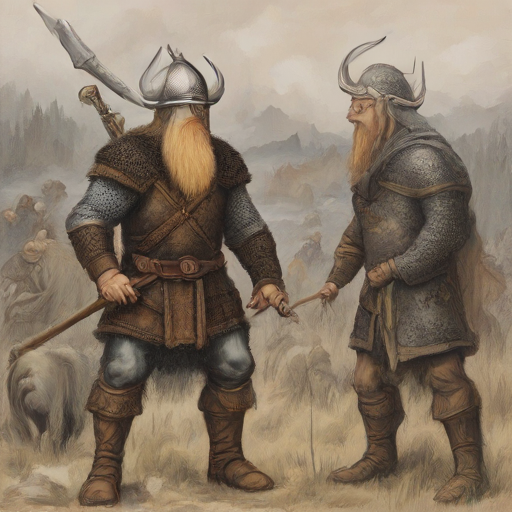

Sure, here's a short poem about Vikings:

In the land of ice and snow,
Lived the brave and fierce Viking crew.
With longships they would sail,
To lands unknown, they'd never fail.

Their helmets gleamed in the sun,
As they battled, one by one.
With axes in hand, they'd fight,
Against all odds, they'd never quit.

Their longships cut through the waves,
As they explored, they'd leave their traces.
From Norway to the British Isles,
They left their mark, they left their trails.

So here's to the Viking crew,
May their legacy forever be true.
In the land of ice and snow,
They'll always be remembered, they'll never grow old.





In [11]:
# We will use the audio response from a couple of cells back.
completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=tts_response.content.decode("utf-8"),
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={
        "system_message": SYSTEM_MESSAGE,
        "audio_format": "wav",
        "voice": "DukeNukem",
    },
)

response_text = completion.choices[0].text
display_content(response_text)